In [2]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [3]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [4]:
EGS11Tyl = candels[-5]

delz = EGS11Tyl[0]
nearby = EGS11Tyl[1][1]
host = EGS11Tyl[1][2]
lc = EGS11Tyl[1][3]

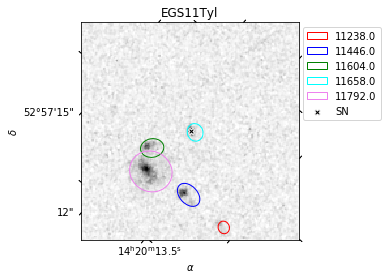

In [5]:
nick = EGS11Tyl[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(EGS11Tyl[1][0]['RA'],EGS11Tyl[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.009,val_max = .0585 )

In [11]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.mass[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

1 ID,12 zbest,9 zspec,8 zphot,15 zphot_l95,16 zphot_u95
float64,float64,float64,float64,float64,float64
11238.0,2.497,-99.0,2.497,0.28,3.15
11446.0,2.465,-99.0,2.465,2.13,2.73
11604.0,0.369,-99.0,0.369,0.14,3.5
11658.0,0.683,-99.0,0.683,0.16,1.36
11792.0,1.03,1.03,0.984,0.71,1.03


## Host is clear (11658) photoz = 0.683 = [0.16,1.36] 

## From evernote host photoz = 2.712 = [0.49,4.3] 

## huge uncertainty on both and bad disagreement between peaks

## Evernote not fully up to date, is published (see paper link below) as  host+SN phot z ~ 2.24 +- 0.1; used host as prior in stardust to bound z, classification probability not very clear pIa ~ 0.24

## This one should be looked at again 


## https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20150010729.pdf

In [5]:
lc

[<Table length=6>
   time    band    flux  fluxerr   mag    magerr zpsys    zp  
 float64   str7  float64 float64 float64 float64  str4 float64
 ------- ------- ------- ------- ------- ------- ----- -------
 55708.6   F160W  11.287   1.287  24.869   0.123  VEGA    27.5
 55725.3   F160W  10.135   1.596  24.985    0.17  VEGA    27.5
 55708.6   F125W  11.605   1.119  24.838   0.104  VEGA    27.5
 55725.3   F125W  10.526   1.091  24.944   0.112  VEGA    27.5
 55655.5 UVF814W     0.0   0.912    27.6    -9.0  VEGA    -inf
 55704.7 UVF814W     0.0   1.096    27.4    -9.0  VEGA    -inf]